In [2]:
spark

In [3]:
#import statements
from pyspark.sql import SparkSession
import pandas as pd
from pyspark.sql.functions import *
from datetime import datetime

In [4]:
spark = SparkSession.builder.appName('Final_project_summary_info').getOrCreate()
sc = spark.sparkContext

In [5]:
#Datapath
path_comments = "/user/rroongseang/bigdata/comments/"
path_users = "/user/rroongseang/bigdata/users/"

In [6]:
df = spark.read.json(path_comments+"politics_json*")

In [7]:
#Convert column types to integers and timestamps
from pyspark.sql.types import IntegerType

df = df.withColumn("ups", df["ups"].cast(IntegerType())) 
df = df.withColumn("downs", df["downs"].cast(IntegerType()))
df = df.withColumn("gilded", df["gilded"].cast(IntegerType()))
df = df.withColumn("score", df["score"].cast(IntegerType()))
df = df.withColumn("retrieved_on", df["retrieved_on"].cast(IntegerType()))
df = df.withColumn("controversiality", df["controversiality"].cast(IntegerType()))
df = df.withColumn('created_utc',df["created_utc"].cast(IntegerType()))
df = df.withColumn('retrieved_on',df["retrieved_on"].cast(IntegerType()))


df = df.withColumn('created_utc',to_timestamp(df["created_utc"]))
df = df.withColumn('retrieved_on',to_timestamp(df["retrieved_on"]))

In [8]:
df.printSchema()

root
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: integer (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- downs: integer (nullable = true)
 |-- gilded: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: integer (nullable = true)
 |-- score_hidden: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- ups: integer (nullable = true)



In [9]:
df.show(5)

+--------+-------------+----------------------+-----------------+--------------------+----------------+-------------------+-------------+-----+------+-------+---------+----+----------+-------------------+-----+------------+---------+------------+---+
|archived|       author|author_flair_css_class|author_flair_text|                body|controversiality|        created_utc|distinguished|downs|gilded|     id|  link_id|name| parent_id|       retrieved_on|score|score_hidden|subreddit|subreddit_id|ups|
+--------+-------------+----------------------+-----------------+--------------------+----------------+-------------------+-------------+-----+------+-------+---------+----+----------+-------------------+-----+------------+---------+------------+---+
|    null|VoteObama2020|                  null|             null|We raised taxes o...|               0|2015-11-16 14:22:30|         null| null|     0|cx2ft0x|t3_3sz3vw|null|t1_cx2fg87|2015-12-11 07:01:48|    1|        null| politics|    t5_2cneq| 

## Visualization of posts

In [9]:
df.groupBy("created_utc").count().show()

+-------------------+-----+
|        created_utc|count|
+-------------------+-----+
|2015-10-18 20:00:14|    1|
|2016-11-07 14:35:43|    2|
|2016-09-11 17:27:20|    1|
|2016-08-22 12:50:55|    1|
|2016-08-18 10:02:44|    1|
|2019-08-14 16:15:23|    1|
|2019-02-16 18:59:53|    1|
|2019-06-27 22:08:23|    1|
|2019-05-02 09:34:51|    1|
|2018-04-21 08:40:23|    1|
|2015-04-11 10:03:55|    1|
|2016-12-27 01:01:46|    1|
|2016-11-21 11:19:25|    1|
|2016-07-02 21:06:29|    1|
|2016-07-18 17:37:40|    1|
|2016-11-12 15:36:15|    1|
|2016-11-13 07:43:28|    1|
|2016-02-18 12:52:08|    1|
|2016-03-22 14:37:19|    1|
|2016-01-28 09:20:54|    1|
+-------------------+-----+
only showing top 20 rows



In [10]:
from pyspark.sql.functions import year, month, dayofmonth

stats = df.groupby(
    year('created_utc').alias('year'), 
    month('created_utc').alias('month')).count()

stats.show()

+----+-----+------+
|year|month| count|
+----+-----+------+
|2015|    2| 14673|
|2017|    3|133234|
|2017|    8|135155|
|2019|    5|125488|
|2018|   10|164340|
|2017|   10|118180|
|2015|   12| 43541|
|2016|    7|139704|
|2016|   11|196185|
|2019|    3|155067|
|2018|    1|136459|
|2018|    3|145975|
|2016|    5| 95312|
|2014|   12|    91|
|2018|    8|145876|
|2019|    8|141950|
|2016|    2| 96600|
|2019|    6|127275|
|2017|    7|126965|
|2019|    1|197977|
+----+-----+------+
only showing top 20 rows



In [11]:
stats_pdf = stats.toPandas()

In [12]:
stats_pdf.head(5)

,year,month,count
0,2015,2,14673
1,2017,3,133234
2,2017,8,135155
3,2019,5,125488
4,2018,10,164340


In [13]:
pdf = stats_pdf.sort_values(by=['year', 'month'])

In [14]:
pdf.head()

,year,month,count
13,2014,12,91
50,2015,1,16630
0,2015,2,14673
37,2015,3,18093
20,2015,4,18483


In [15]:
pdf = pdf.reset_index(drop=True)
pdf.head()

,year,month,count
0,2014,12,91
1,2015,1,16630
2,2015,2,14673
3,2015,3,18093
4,2015,4,18483


In [16]:
# convert into a str with leading 0
pdf['month'] = pdf['month'].apply(str)
pdf['month'] = pdf['month'].str.zfill(2)

pdf.head()

,year,month,count
0,2014,12,91
1,2015,01,16630
2,2015,02,14673
3,2015,03,18093
4,2015,04,18483


In [17]:
pdf['year'] = pdf['year'].apply(str)
pdf['year_month'] = pdf['year'] + '-' + pdf['month']

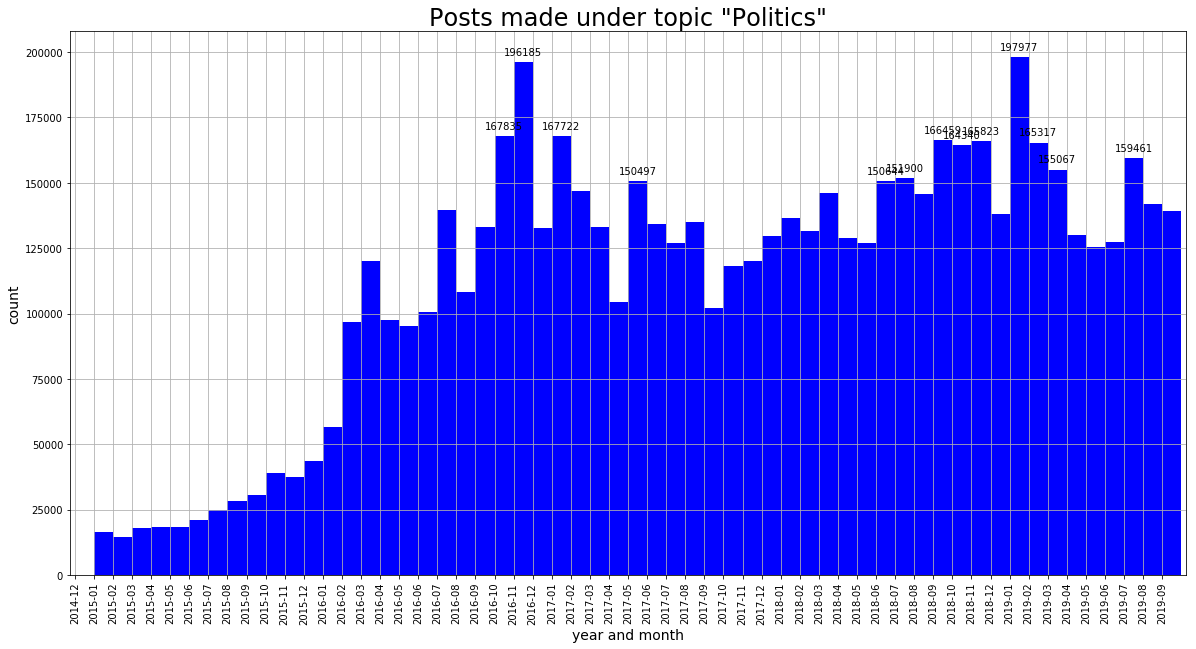

In [18]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

ax = pdf.plot(kind='bar', y="count", x='year_month', align='edge', width=1.0, figsize=(20,10), color='blue', legend=False)
ax.grid()
plt.title("Posts made under topic \"Politics\"", size=24)
plt.ylabel("count", size=14)
plt.xlabel("year and month", size=14)

for p in ax.patches:
    if p.get_height() > 150000:
        ax.annotate(np.round(p.get_height(),decimals=2), (p.get_x()+p.get_width()/2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

## Word Cloud

In [10]:
df.select('body').show(3)

+--------------------+
|                body|
+--------------------+
|We raised taxes o...|
|I did read your c...|
|        You racist. |
+--------------------+
only showing top 3 rows



In [11]:
from pyspark.ml import Pipeline
from pyspark.ml.feature import RegexTokenizer, StopWordsRemover

# Configure an ML pipeline, which consists of three stages: tokenizer, stopWordsRemover, and hashingTF.
tokenizer = RegexTokenizer(inputCol="body", outputCol="tokens", pattern="\\W")
remover = StopWordsRemover(inputCol="tokens", outputCol="refined_tokens")

pipeline = Pipeline(stages=[tokenizer, remover])

# Fit the pipeline to training documents.
words = pipeline.fit(df)

# Show the transformed results without having predictions yet
transformed = words.transform(df)

In [12]:
transformed = transformed.withColumn('year', year(col('created_utc')))

In [13]:
transformed = transformed.withColumn('month', month(col('created_utc')))

In [14]:
transformed.select('body', 'tokens', 'refined_tokens', 'year', 'month').show(3)

+--------------------+--------------------+--------------------+----+-----+
|                body|              tokens|      refined_tokens|year|month|
+--------------------+--------------------+--------------------+----+-----+
|We raised taxes o...|[we, raised, taxe...|[raised, taxes, r...|2015|   11|
|I did read your c...|[i, did, read, yo...|[read, commemt, r...|2015|   11|
|        You racist. |       [you, racist]|            [racist]|2015|   11|
+--------------------+--------------------+--------------------+----+-----+
only showing top 3 rows



In [15]:
transformed.printSchema()

root
 |-- archived: boolean (nullable = true)
 |-- author: string (nullable = true)
 |-- author_flair_css_class: string (nullable = true)
 |-- author_flair_text: string (nullable = true)
 |-- body: string (nullable = true)
 |-- controversiality: integer (nullable = true)
 |-- created_utc: timestamp (nullable = true)
 |-- distinguished: string (nullable = true)
 |-- downs: integer (nullable = true)
 |-- gilded: integer (nullable = true)
 |-- id: string (nullable = true)
 |-- link_id: string (nullable = true)
 |-- name: string (nullable = true)
 |-- parent_id: string (nullable = true)
 |-- retrieved_on: timestamp (nullable = true)
 |-- score: integer (nullable = true)
 |-- score_hidden: boolean (nullable = true)
 |-- subreddit: string (nullable = true)
 |-- subreddit_id: string (nullable = true)
 |-- ups: integer (nullable = true)
 |-- tokens: array (nullable = true)
 |    |-- element: string (containsNull = true)
 |-- refined_tokens: array (nullable = true)
 |    |-- element: string (co

In [16]:
df_2016_11 = transformed.where(transformed.year == 2016).where(transformed.month == 11)
df_2019_2 = transformed.where(transformed.year == 2019).where(transformed.month == 2)
df_2019_9 = transformed.where(transformed.year == 2019).where(transformed.month == 9)

In [19]:
df_2019_2.show(3)

+--------+-----------+----------------------+-----------------+--------------------+----------------+-------------------+-------------+-----+------+-------+---------+----+----------+-------------------+-----+------------+---------+------------+----+--------------------+--------------------+----+-----+
|archived|     author|author_flair_css_class|author_flair_text|                body|controversiality|        created_utc|distinguished|downs|gilded|     id|  link_id|name| parent_id|       retrieved_on|score|score_hidden|subreddit|subreddit_id| ups|              tokens|      refined_tokens|year|month|
+--------+-----------+----------------------+-----------------+--------------------+----------------+-------------------+-------------+-----+------+-------+---------+----+----------+-------------------+-----+------------+---------+------------+----+--------------------+--------------------+----+-----+
|    null|  [deleted]|                  null|             null|           [removed]|       

In [20]:
from pyspark.sql.functions import array_contains, col, explode

# explode lists and retrieve all of the refined tokens
words_list_2016_11 = [x[0] for x in df_2016_11.select(explode('refined_tokens').alias('refined_tokens')).collect()]
words_list_2019_02 = [x[0] for x in df_2019_2.select(explode('refined_tokens').alias('refined_tokens')).collect()]
words_list_2019_09 = [x[0] for x in df_2019_9.select(explode('refined_tokens').alias('refined_tokens')).collect()]

In [21]:
# count of total tags
len(words_list_2019_02)

2766006

In [22]:
# get unique words
words_set = set(words_list_2019_02)
len(words_set)

67976

In [23]:
# use to get counts
import pandas as pd
pandas_series_2019_02 = pd.Series(words_list_2019_02)
pandas_series_2019_02.value_counts()

people                                     23227
trump                                      22350
like                                       19311
gt                                         14119
re                                         12840
one                                        12453
removed                                    12337
think                                      11938
get                                        11900
m                                          11499
politics                                   10717
https                                      10634
even                                        9414
r                                           9209
right                                       9204
know                                        8551
com                                         8453
see                                         8400
time                                        8161
us                                          8076
deleted             

In [24]:
# install wordcloud
#!conda install -c conda-forge wordcloud==1.4.1 --yes

# import package and its set of stopwords
from wordcloud import WordCloud, STOPWORDS

print ('Wordcloud is installed and imported!')

Wordcloud is installed and imported!


`Word` clouds are commonly used to perform high-level analysis and visualization of text data.

In [25]:
#convert list to string and generate
comments_string_2016_11=(" ").join(words_list_2016_11)
comments_string_2019_02=(" ").join(words_list_2019_02)
comments_string_2019_09=(" ").join(words_list_2019_09)

In [26]:
# instantiate a word cloud object
comments = WordCloud(
    background_color='white',
    max_words=2000)

# generate the word cloud
comments.generate(comments_string_2019_02)

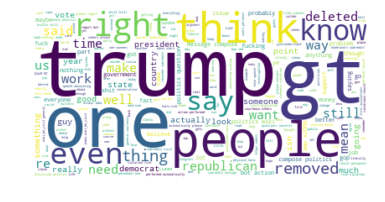

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline

# display the word cloud
plt.imshow(comments, interpolation='bilinear')
plt.axis('off')
plt.show()

In [28]:
# generate the word cloud
comments.generate(comments_string_2019_09)

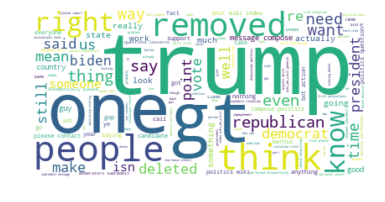

In [29]:
# display the word cloud
plt.imshow(comments, interpolation='bilinear')
plt.axis('off')
plt.show()

In [30]:
# generate the word cloud
comments.generate(comments_string_2016_11)

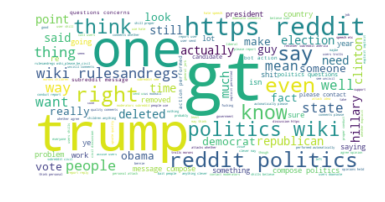

In [31]:
# display the word cloud
plt.imshow(comments, interpolation='bilinear')
plt.axis('off')
plt.show()